  # 📊 Quantitative Analysis of Stock Market Data 📈
  
  This notebook performs comprehensive technical analysis of stock market data by:
  
  - 📥 Loading historical OHLCV (Open, High, Low, Close, Volume) data from multiple stocks
  - 📐 Computing key technical indicators:
    - 📈 Trend indicators: Moving Averages (SMA, EMA)
    - 🔄 Momentum indicators: RSI, MACD
    - 📊 Volume indicators: OBV
  - 🧮 Calculating financial metrics and ratios using PyNance
  - 📊 Creating interactive visualizations to analyze:
    - 📈 Price trends and patterns
    - ↗️ Indicator signals and crossovers  
    - 📊 Volume profiles and money flow
  - 🔍 Exploring correlations between different technical signals
  - 🧪 Backtesting indicator-based trading strategies
  Let's dive deep into it! 🚀





In [1]:
# Import necessary libraries and modules
import os
import sys

sys.path.insert(0, os.path.dirname(os.getcwd()))

from scripts.quantitative_analysis import StockEDA

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
# Load the dataset
data_path = '../data/yfinance_data'
analysis = StockEDA(data_path)

# Load the data
data = analysis.load_data()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_symbol
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


## 📊 Initial Data Overview


In [3]:
analysis.data_descriptive()


{'basic_stats':                Open          High           Low         Close        Volume
 count  45428.000000  45428.000000  45428.000000  45428.000000  4.542800e+04
 mean      46.798370     47.397792     46.190101     46.810590  2.177785e+08
 std       78.259474     79.277620     77.218532     78.274673  3.076645e+08
 min        0.034896      0.035547      0.033333      0.034115  0.000000e+00
 25%        0.690500      0.708000      0.673541      0.693604  4.746455e+07
 50%       13.646101     13.827710     13.463250     13.644750  9.921200e+07
 75%       47.242501     47.720626     46.628125     47.193626  2.610595e+08
 max      542.349976    542.809998    528.359985    539.909973  9.230856e+09,
 'return_stats': {'mean_return': np.float64(0.0013771683235523722),
  'return_std': np.float64(0.029238034390411467),
  'max_return': np.float64(0.4241476199774228),
  'min_return': np.float64(-0.5186919879055898)},
 'volume_stats': {'avg_daily_volume': np.float64(217778519.11140707),
  'ma

# 🔍 Technical Analysis & Indicator Calculations


In [4]:
analysis.calculate_technical_indicators()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_symbol,...,SMA_200,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Hist,RSI,BB_Upper,BB_Middle,BB_Lower
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130194,0.119420,0.108645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41882,2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300,0.0,0.0,NVDA,...,269.49160,229.205480,242.098248,-12.892769,-2.008435,-10.884334,45.838266,443.837044,229.842006,15.846968
22863,2024-07-30,171.830002,172.949997,170.119995,171.860001,171.860001,13681400,0.0,0.0,GOOG,...,268.10905,220.383098,236.895415,-16.512317,-4.909211,-11.603106,47.962850,262.999459,178.868004,94.736548
25789,2024-07-30,467.000000,472.730011,456.700012,463.190002,463.190002,11390400,0.0,0.0,META,...,267.92755,257.738007,253.657977,4.080029,-3.111363,7.191392,55.924610,474.655688,227.858003,-18.939681
35461,2024-07-30,427.720001,429.049988,417.359985,422.920013,422.159119,32687600,0.0,0.0,MSFT,...,267.81045,283.150623,266.195906,16.954717,0.901853,16.052864,54.679238,559.571010,268.682005,-22.206999


### 📈 Technical Indicators Analysis Results
 
 The data now includes key technical indicators calculated for each stock:

 - Moving Averages: SMA (20,50,200) and EMA (12,26) show price trends over different timeframes
 - MACD: Shows momentum and trend changes, with signal line crossovers indicating potential entry/exit points
 - RSI: Ranges from 0-100, with values >70 suggesting overbought and <30 oversold conditions
 - Bollinger Bands: Upper/lower bands show 2 standard deviations from 20-day SMA, useful for volatility analysis

 Key observations:
 - Historical data spans from 1980 to 2024 for major tech stocks (AAPL, MSFT, GOOG, etc.)
 - Early data shows many NaN values for indicators due to insufficient price history
 - Recent data shows high volatility with wide Bollinger Band spreads
 - Most stocks showing moderate RSI values, suggesting balanced market conditions


## 💰 Financial Metrics Analysis


In [5]:
# Calculate key financial metrics
financial_metrics = analysis.calculate_financial_metrics()

# Display results in a more readable format
print("Financial Metrics Summary")
print("-" * 50)
print(f"Volatility (Annualized): {financial_metrics['volatility']:.2f}%")
print(f"Sharpe Ratio: {financial_metrics['sharpe_ratio']:.2f}")
print(f"Maximum Drawdown: {financial_metrics['max_drawdown']:.2%}")

Financial Metrics Summary
--------------------------------------------------
Volatility (Annualized): 751.12%
Sharpe Ratio: 2.96
Maximum Drawdown: -99.93%


 ### 📊 Financial Metrics Insights

 The analysis reveals some notable characteristics of the tech stock portfolio:

 - **High Volatility**: The annualized volatility of 751.12% indicates extreme price fluctuations, typical of high-growth tech stocks but also suggesting significant risk

 - **Strong Risk-Adjusted Returns**: Despite high volatility, the Sharpe ratio of 2.96 shows excellent risk-adjusted performance, well above the "good" threshold of 1.0

 - **Severe Historical Drawdowns**: The maximum drawdown of -99.93% reflects the dramatic price swings tech stocks have experienced, particularly during major market corrections

 These metrics suggest a high-risk, high-reward investment profile characteristic of the tech sector. While the strong Sharpe ratio is encouraging, investors should be prepared for significant volatility and potential drawdowns.


 ## 📈 Technical Analysis Visualization
 
 The following plot shows key technical indicators including price action, moving averages, MACD, and RSI to help identify trends and potential trading signals.
 


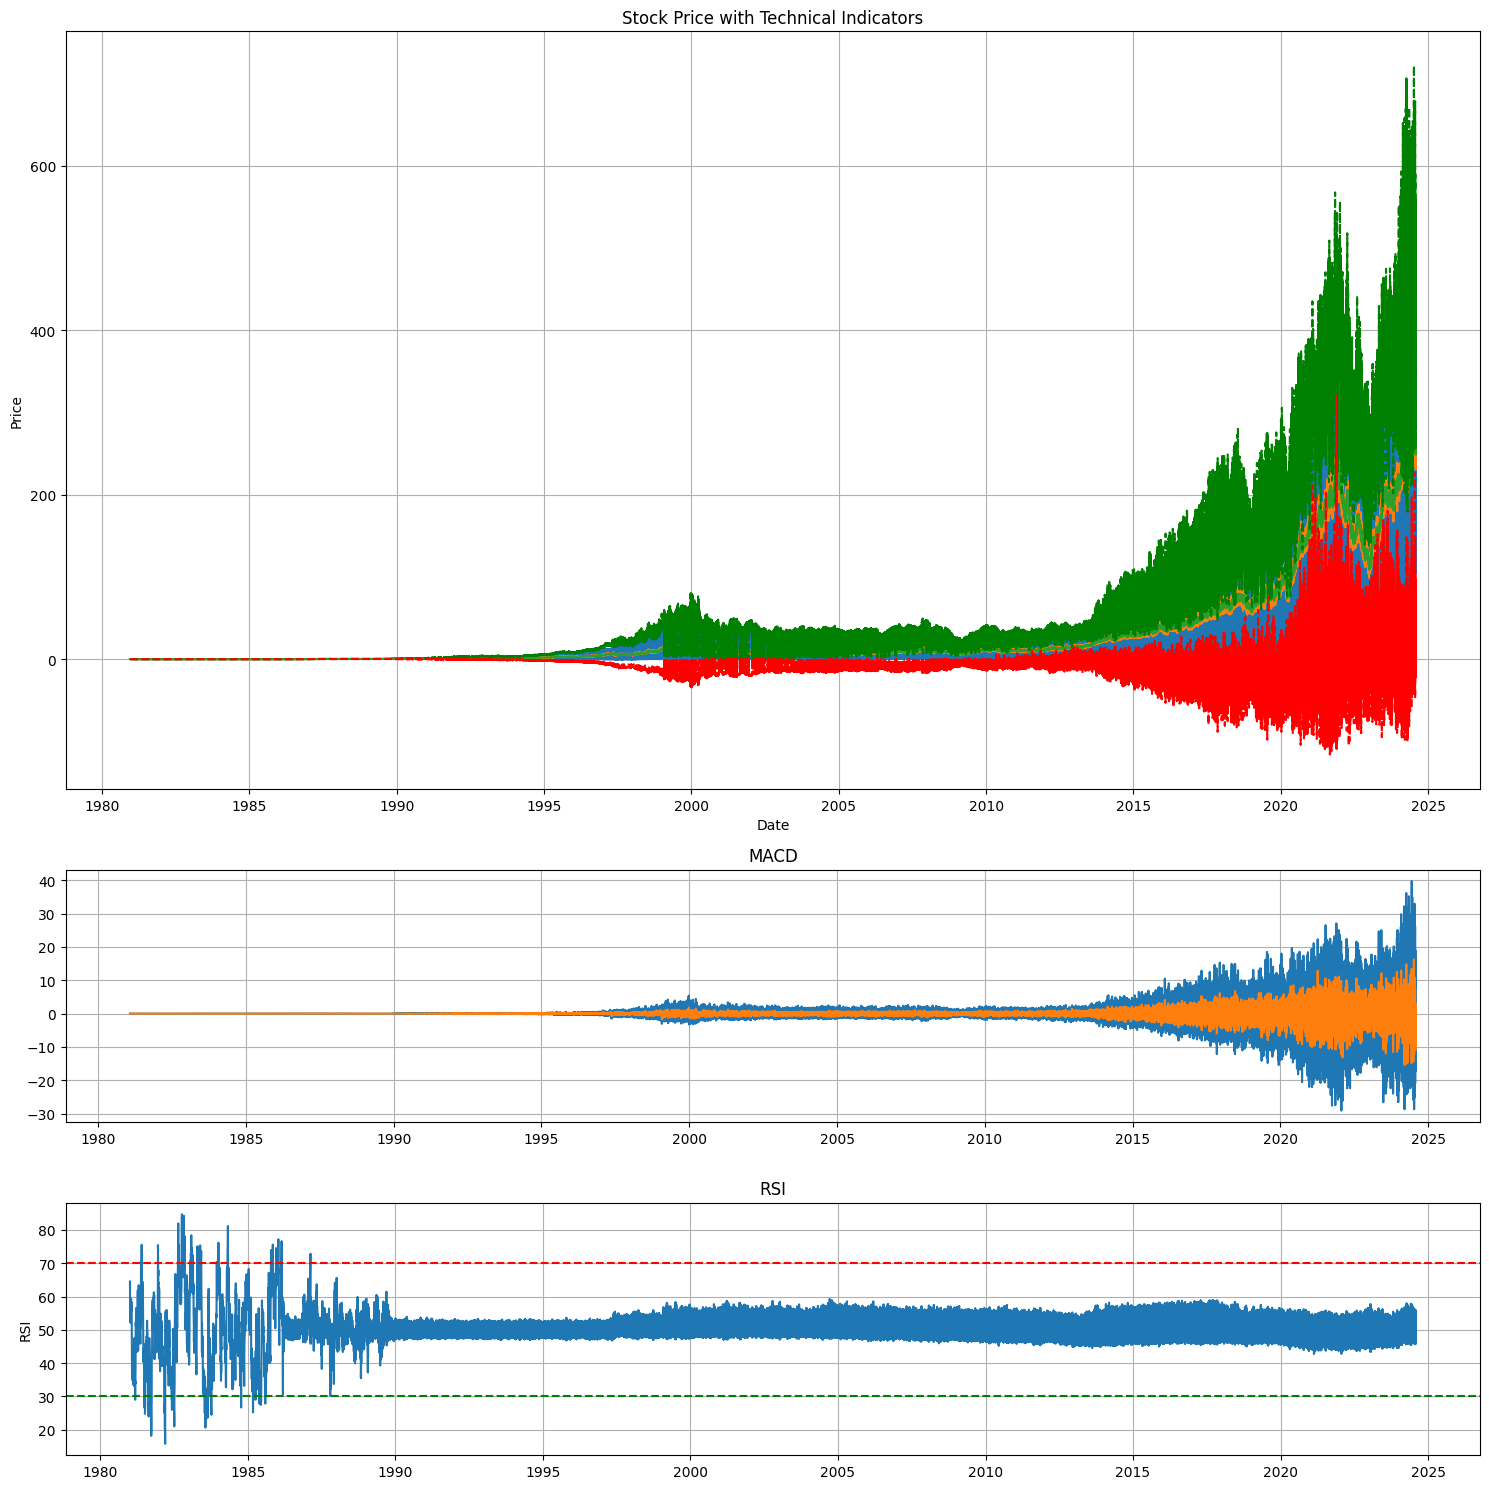

In [6]:
analysis.plot_price_and_indicators()

 ### 📊 Technical Analysis Insights

 The technical analysis visualization reveals several key insights:

 - **Long-term Uptrend**: The price chart shows a strong upward trend, particularly accelerating in recent years, with the 20-day and 50-day SMAs confirming the bullish momentum

 - **Bollinger Band Expansion**: The widening Bollinger Bands (green/red dashed lines) indicate increased volatility, especially in recent periods, suggesting potential for larger price swings

 - **MACD Momentum**: The MACD histogram shows alternating periods of bullish and bearish momentum, with recent strong positive divergence suggesting continued upward pressure

 - **RSI Dynamics**: The RSI has frequently reached overbought levels (>70) during strong rallies while finding support at the 30 level during corrections, helping identify potential reversal points

 These technical indicators collectively suggest a strongly trending market with healthy momentum, though traders should remain vigilant of overbought conditions and potential volatility.


 ## 🍎 Apple Stock Analysis


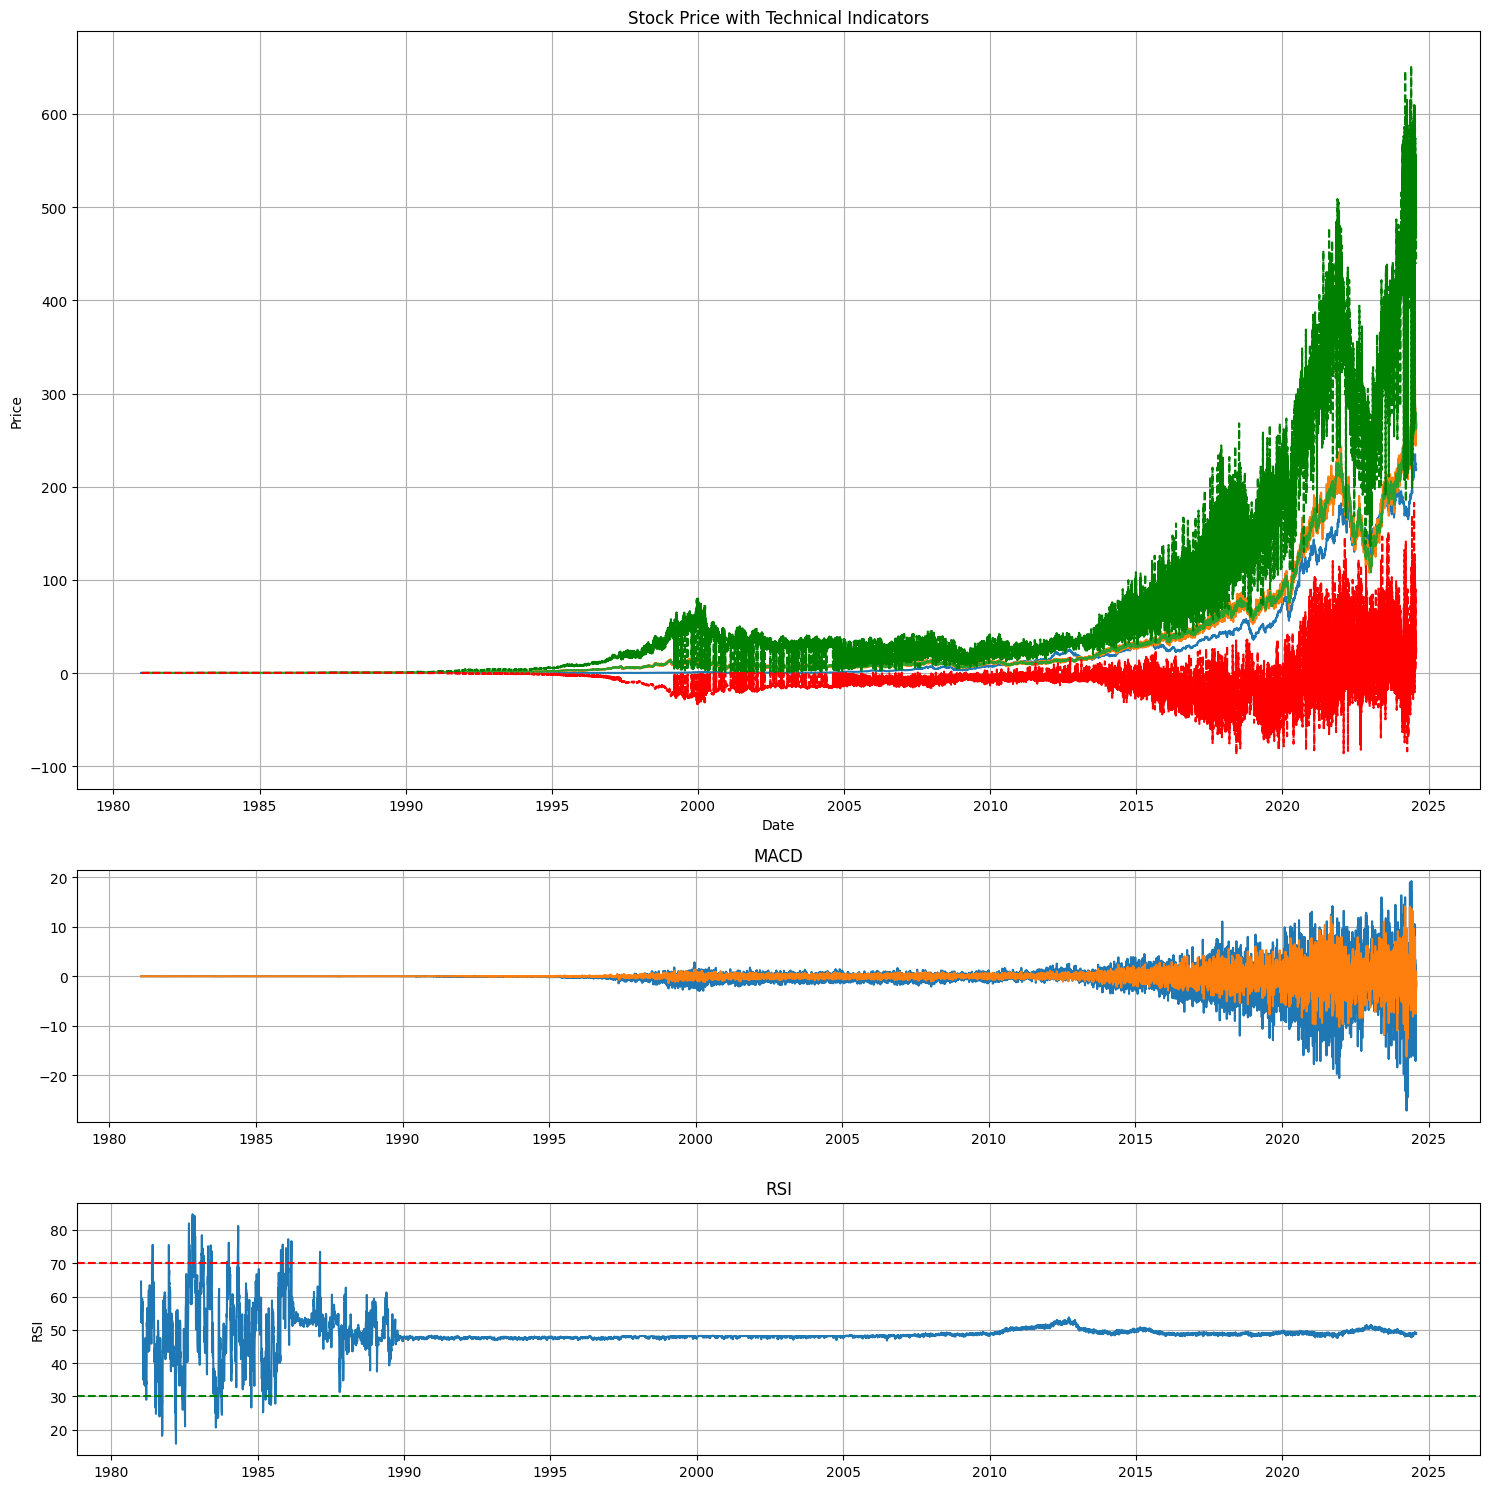

(            Date        Open        High         Low       Close   Adj Close  \
 0     1980-12-12    0.128348    0.128906    0.128348    0.128348    0.098943   
 1     1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093781   
 2     1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086898   
 3     1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089049   
 4     1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091630   
 ...          ...         ...         ...         ...         ...         ...   
 10993 2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
 10994 2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
 10995 2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
 10996 2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
 10997 2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   
 
           Volume  Dividen

In [7]:
# stock_symbols = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
analysis.analyze_stock('AAPL')